<a href="https://colab.research.google.com/github/ReL001/Assignment-1/blob/main/tutorials/W1D1_Generalization/student/W1D1_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/neuromatch/NeuroAI_Course/blob/main/tutorials/W1D1_Generalization/student/W1D1_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/NeuroAI_Course/main/tutorials/W1D1_Generalization/student/W1D1_Tutorial1.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 1: Generalization in AI

**Week 1, Day 1: Generalization**

**By Neuromatch Academy**

__Content creators:__ Samuele Bolotta & Patrick Mineault

__Content reviewers:__ Samuele Bolotta, Lily Chamakura, RyeongKyung Yoon, Yizhou Chen, Ruiyi Zhang, Aakash Agrawal, Alish Dipani, Hossein Rezaei, Yousef Ghanbari, Mostafa Abdollahi, Hlib Solodzhuk, Alex Murphy

__Production editors:__ Konstantine Tsafatinos, Ella Batty, Spiros Chavlis, Samuele Bolotta, Hlib Solodzhuk, Alex Murphy


___


# Tutorial Objectives

*Estimated timing of tutorial: 75 minutes*

This tutorial will introduce you to the concept of *generalization* in the context of modern AI systems. We'll look at a particular system trained for handwriting recognition – TrOCR. We'll review what makes that model tick–the transformer architecture–and explore what goes into training and finetuning large-scale models. We'll look at how data augmentation can in the training phase can make the model more tolerant to certain input data transformations like scaling and cropping.

Our learning objectives for today are:

1. Identify and articulate common objectives pursued by AI researchers and developers, such as:

- Out-of-Distribution (OOD) robustness; Latency; Size, Weight, Power, and Cost (SWaP-C)
- Explainability and understanding

2. Explain at least three strategies for enhancing the generalization capabilities of AI systems, including the contemporary trend of training generic large-scale models on extensive datasets (foundation models).

3. Gain practical experience with the fundamentals of deep learning and PyTorch.

**Important note**: this tutorial leverages GPU acceleration. Using a GPU runtime in colab will make the the tutorial run 10x faster.

Let's get started!

In [6]:
# @title Tutorial slides
# @markdown These are the slides for the videos in all tutorials today

from IPython.display import IFrame
from ipywidgets import widgets
out = widgets.Output()

link_id = "79523"

with out:
    print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
    display(IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=730, height=410))
display(out)

Output()

# Definitions

- **Callback** (function) - a function passed as an argument to another function, which then calls (or "calls back") the passed function at a later time
- **Checkpoint** - a saved ML model which can be re-loaded, typically used for deep neural network
- **Inductive Bias** - the set of assumptions a machine learning model makes to generalize from training data to unseen examples. In deep learning, it's the architectural choices—like network depth, connectivity patterns, and activation functions—that predispose a model to learn certain types of patterns over others, even before seeing any data.
- **Optical Character Recognition (OCR)** - a technology that converts scanned documents (e.g. PDFs) into machine-readable text

---
# Setup



In [7]:
# @title Install and import feedback gadget

!pip install vibecheck Pillow matplotlib torch torchvision transformers gradio protobuf sentencepiece gradio torchmetrics --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "neuromatch_neuroai",
            "user_key": "wb2cxze8",
        },
    ).render()


feedback_prefix = "W1D1_T1"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
# @title Import dependencies

# Standard Libraries for file and operating system operations, security, and web requests
import os
import functools
import hashlib
import requests
import logging
import io
import re
import time

# Core python data science and image processing libraries
import numpy as np
from PIL import Image as IMG
from PIL import ImageDraw, ImageFont
import matplotlib.pyplot as plt
import tqdm

# Deep Learning and model specific libraries
import torch
import torchmetrics.functional.text as fm
import transformers
from torchvision import transforms
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# Utility and interface libraries
import gradio as gr
from IPython.display import IFrame, display, Image
import sentencepiece
import zipfile
import pandas as pd


device = "cuda" if torch.cuda.is_available() else "cpu"

In [9]:
# @title Figure settings
# @markdown

logging.getLogger('matplotlib.font_manager').disabled = True

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # perfrom high definition rendering for images and plots
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [10]:
# @title Plotting functions

def display_image(image_path):
    """Display an image from a given file path.

    Inputs:
    - image_path (str): The path to the image file.
    """
    # Open the image
    image = Image.open(image_path)
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off the axis
    plt.show()

def display_transformed_images(image, transformations):
    """
    Apply a list of transformations to an image and display them.

    Inputs:
    - image (Tensor): The input image as a tensor.
    - transformations (list): A list of torchvision transformations to apply.
    """
    # Convert tensor image to PIL Image for display
    pil_image = transforms.ToPILImage()(image)

    fig, axs = plt.subplots(len(transformations) + 1, 1, figsize=(5, 15))
    axs[0].imshow(pil_image, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for i, transform in enumerate(transformations):
        # Apply transformation if it's not the placeholder
        if transform != "Custom ElasticTransform Placeholder":
            transformed_image = transform(image)
            # Convert transformed tensor image to PIL Image for display
            display_image = transforms.ToPILImage()(transformed_image)
            axs[i+1].imshow(display_image, cmap='gray')
            axs[i+1].set_title(transform.__class__.__name__)
            axs[i+1].axis('off')
        else:
            axs[i+1].text(0.5, 0.5, 'ElasticTransform Placeholder', ha='center')
            axs[i+1].axis('off')

    plt.tight_layout()
    plt.show()

def display_original_and_transformed_images(original_tensor, transformed_tensor):
    """
    Display the original and transformed images side by side.

    Inputs:
    - original_tensor (Tensor): The original image as a tensor.
    - transformed_tensor (Tensor): The transformed image as a tensor.
    """
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Display original image
    original_image = original_tensor.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    axs[0].imshow(original_image, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    # Display transformed image
    transformed_image = transformed_tensor.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    axs[1].imshow(transformed_image, cmap='gray')
    axs[1].set_title('Transformed')
    axs[1].axis('off')

    plt.show()

def display_generated_images(generator):
    """
    Display images generated from strings.

    Inputs:
    - generator (GeneratorFromStrings): A generator that produces images from strings.
    """
    plt.figure(figsize=(15, 3))
    for i, (text_img, lbl) in enumerate(generator, 1):
        ax = plt.subplot(1, len(generator.strings) * generator.count // len(generator.strings), i)
        plt.imshow(text_img)
        plt.title(f"Example {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# Function to generate an image with text
def generate_image(text, font_path, space_width=2, skewing_angle=8):
    """Generate an image with text.

    Args:
        text (str): Text to be rendered in the image.
        font_path (str): Path to the font file.
        space_width (int): Space width between characters.
        skewing_angle (int): Angle to skew the text image.
    """
    image_size = (350, 50)
    background_color = (255, 255, 255)
    speckle_threshold = 0.05
    speckle_color = (200, 200, 200)
    background = np.random.rand(image_size[1], image_size[0], 1) * 64 + 191
    background = np.tile(background, [1, 1, 4])
    background[:, :, -1] = 255
    image = IMG.fromarray(background.astype('uint8'), 'RGBA')
    image2 = IMG.new('RGBA', image_size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(image2)
    font = ImageFont.truetype(font_path, size=36)
    text_size = draw.textlength(text, font=font)
    text_position = ((image_size[0] - text_size) // 2, (image_size[1] - font.size) // 2)
    draw.text(text_position, text, font=font, fill=(0, 0, 0), spacing=space_width)
    image2 = image2.rotate(skewing_angle)
    image.paste(image2, mask=image2)
    return image

# Function to generate images for multiple strings
def image_generator(strings, font_path, space_width=2, skewing_angle=8):
    """Generate images for multiple strings.

    Args:
        strings (list): List of strings to generate images for.
        font_path (str): Path to the font file.
        space_width (int): Space width between characters.
        skewing_angle (int): Angle to skew the text image.
    """
    for text in strings:
        yield generate_image(text, font_path, space_width, skewing_angle)

In [11]:
# @title Data retrieval

def download_file(fname, url, expected_md5):
    """
    Downloads a file from the given URL and saves it locally.
    Verifies the integrity of the file using an MD5 checksum.

    Args:
    - fname (str): The local filename/path to save the downloaded file.
    - url (str): The URL from which to download the file.
    - expected_md5 (str): The expected MD5 checksum to verify the integrity of the downloaded data.
    """
    if not os.path.isfile(fname):
        try:
            r = requests.get(url)
            r.raise_for_status()  # Raises an HTTPError for bad responses
        except (requests.ConnectionError, requests.HTTPError) as e:
            print(f"!!! Failed to download {fname} due to: {str(e)} !!!")
            return
        if hashlib.md5(r.content).hexdigest() == expected_md5:
            with open(fname, "wb") as fid:
                fid.write(r.content)
            print(f"{fname} has been downloaded successfully.")
        else:
            print(f"!!! Data download appears corrupted, {hashlib.md5(r.content).hexdigest()} !!!")

def extract_zip(zip_fname, folder='.'):
    """
    Extracts a ZIP file to the specified folder.

    Args:
    - zip_fname (str): The filename/path of the ZIP file to be extracted.
    - folder (str): Destination folder where the ZIP contents will be extracted.
    """
    if zipfile.is_zipfile(zip_fname):
        with zipfile.ZipFile(zip_fname, 'r') as zip_ref:
            zip_ref.extractall(folder)
            print(f"Extracted {zip_fname} to {folder}.")
    else:
        print(f"Skipped extraction for {zip_fname} as it is not a zip file.")

# Define the list of files to download, including both ZIP files and other file types
file_info = [
    ("Dancing_Script.zip", "https://osf.io/32yed/download", "d59bd3201b58a37d0d3b4cd0b0ec7400", '.'),
    ("lines.zip", "https://osf.io/8a753/download", "6815ed3987f8eb2fd3bc7678c11f2e9e", 'lines'),
    ("transcripts.csv", "https://osf.io/9hgr8/download", "d81d9ade10db55603cc893345debfaa2", None),
    ("neuroai_hello_world.png", "https://osf.io/zg4w5/download", "f08b81e47f2fe66b5f25b2ccc204c780", None),  # New image file
    ("sample0.png", "https://github.com/neuromatch/NeuroAI_Course/blob/main/tutorials/W1D1_Generalization/static/sample_0.png?raw=true", '920ae567f707bfee0be29dc854f804ed', None),
    ("sample1.png", "https://github.com/neuromatch/NeuroAI_Course/blob/main/tutorials/W1D1_Generalization/static/sample_1.png?raw=true", 'cd28623a829b40d0a1dd8c0f17e9ebd7', None),
    ("sample2.png", "https://github.com/neuromatch/NeuroAI_Course/blob/main/tutorials/W1D1_Generalization/static/sample_2.png?raw=true", 'c189c09abf989eac4e1a8d493bd362d7', None),
    ("sample3.png", "https://github.com/neuromatch/NeuroAI_Course/blob/main/tutorials/W1D1_Generalization/static/sample_3.png?raw=true", 'dcffc678266952f18af1fc1242127e98', None)
]

import contextlib
import io

with contextlib.redirect_stdout(io.StringIO()):
    # Process the downloads and extractions
    for fname, url, expected_md5, folder in file_info:
        download_file(fname, url, expected_md5)
        if folder is not None:
            extract_zip(fname, folder)

In [12]:
# @title Video 1: Overview

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'PgA7wfi2eDo'), ('Bilibili', 'BV1Bm421L7zB')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [13]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_overview_video")

---
# Section 1: Motivation: building a handwriting recognition app with AI

We want to develop an app that can take in an image (like the one shown below) and recognize any handwritten text contained within it.

![Picture which shows the goal of the day.](https://github.com/neuromatch/NeuroAI_Course/blob/main/tutorials/W1D1_Generalization/static/W1D1_goal.png?raw=true)

We don't want to train a new model from scratch if we can avoid it. Instead, we can start from a pretrained model and then adapt it to our needs. We find a suitable model hosted on HuggingFace, the largest repository of pretrained natural language and vision models. [TrOCR](https://huggingface.co/docs/transformers/en/model_doc/trocr) is a Transformer-based model that performs Optical Character Recognition and handwriting transcription. Several checkpoints are available, finetuned for different downstream applications like handwriting transcription and printed character recognition. We can now relax! This model seems like an ideal place to begin.

![Picture which shows trocr architecture.](https://github.com/neuromatch/NeuroAI_Course/blob/main/tutorials/W1D1_Generalization/static/trocr_architecture.png?raw=true)

In this tutorial, we'll look at the design considerations that go into training and deploying a model like TrOCR, what goes on inside the model and the model's transformer layers, and how it performs with regard out-of-distribution generalization, being tested on inputs that were not part of its training distribution. While the NeuroAI course as a whole will explore new ideas at the frontier of neuroscience and AI, we first want to understand one of the core building blocks used in industrial AI: the transformer.

Let's try out this model ourselves!

## Interactive demo 1: TrOCR

We will load a pretrained TrOCR checkpoint from HuggingFace. The `transformers` package from HuggingFace allows us to easily download a PyTorch model. Additionally, we also get access to a *preprocessing class*, which formats new inputs are in the way the model expects. We can load a pretrained checkpoint (saved model) in just a few lines of code.

In [14]:
# Load the pre-trained TrOCR model and processor
with contextlib.redirect_stdout(io.StringIO()):
    model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
    model.to(device=device)
    processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten", use_fast=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

We now write a *callback function* that calls the preloaded model to decode a particular image (transform handwritten text to machine-readable text).

In [15]:
# Define the function to recognize text from an image
def recognize_text(processor, model, image):
    """
    This function takes an image as input and uses a pre-trained language model to generate text from the image.

    Inputs:
    - processor: The processor to use
    - model: The model to use
    - image (PIL Image or Tensor): The input image containing text to be recognized.

    Outputs:
    - text (str): The recognized text extracted from the input image.
    """
    print(image)
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values.to(device))
    text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return text

`Gradio` is an open-source Python framework that makes it easy to build quick interfaces and even full-fledged web applications to interact with machine learning models. We will build a simple interface in `gradio` to try out the model interactively. Go ahead and try some example text to see how it works. You can use images from the internet, or scan your own handwriting. Just make sure that the text fits on one line. Observe the result of the recognized text.

In [16]:
import gradio as gr
import functools

with gr.Blocks() as demo:
    gr.HTML("<h1>Interactive demo: TrOCR</h1>")
    gr.Markdown("Upload a single image or click one of the examples to try this.")

    # Define the examples
    examples = [
        'neuroai_hello_world.png',
        'sample1.png',
        'sample2.png',
        'sample3.png',
    ]

    # Create the image input component
    image_input = gr.Image(type="pil", label="Upload Image")

    # Create the example gallery
    example_gallery = gr.Examples(
        examples,
        image_input,
    )

    # Create the submit button
    with gr.Row():
        submit_button = gr.Button("Recognize Text", scale=1)

        # Create the text output component
        text_output = gr.Textbox(label="Recognized Text", scale=2)

    # Define the event listeners
    submit_button.click(
        fn=functools.partial(recognize_text, processor, model),
        inputs=image_input,
        outputs=text_output
    )

# Launch the interface
demo.launch(height=650)
_

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://104622ee2d81ff8a42.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


''

In [17]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Interactive_Demo_1")

### Discussion point 1

How effective is the model's performance? Does it exhibit generalization beyond its training vocabulary?

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W1D1_Generalization/solutions/W1D1_Tutorial1_Solution_427804b6.py)



In [18]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Discussion_Point_1")

In [19]:
# @title Video 2: OOD Generalization

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'pPljFAsgzA8'), ('Bilibili', 'BV1jx4y1b7Xh')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [20]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_ood_generalization")

---
# Section 2: Measuring out-of-distribution generalization in TrOCR

How well does TrOCR work in practice?

Something you will see a lot of in machine learning papers are tables filled with model scores on various benchmarks. The tables in the [TrOCR official paper](https://arxiv.org/abs/2109.10282) include measures of performance on different benchmark datasets, including IAM, a handwriting database assembled in 1999. The base and large model variants (334M and 558M parameters) display **character error rates (CER) of 3.42 and 2.89, respectively**. That means it gets 97% of characters correct.

Wow! That's probably good enough for our notes app, right? I guess can go ahead and deploy it.

## Think! 1

What are some reasons why the character error rate measured on IAM might be too optimistic?

In [21]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Think_1")

## Coding activity 1: Measuring out-of-distribution generalization

After reading through the fine print in the paper, we realize that the TrOCR is both *trained* on IAM and *tested* on IAM, on a different set of subjects. To be clear, the train and test splits are *distinct*; but samples come from the same underlying distribution (the same style of data). We realize that the reported error rates might be too optimistic:

* IAM was recorded on a tablet. We wants to be able to recognize lines of text handwritten on paper.
* IAM is 25 years old. Maybe people write differently now compared to in the past. Do people even write in cursive anymore?
* The sentences in IAM are based on a widely published corpus. Maybe TrOCR has memorized that corpus.

The more we think about it, the more we realize that the paper's results are really estimating *in-distribution generalization* (the ability to recognize new text samples in the same style). However, what people should really care about is how well the model will work when it's deployed *in the wild*, which is closer to **out-of-distribution generalization**.

In this coding activity, you'll measure out-of-distribution generalization on a small subset of the CVL database:

> Kleber, F., Fiel, S., Diem, M., & Sablatnig, R. (2018). [CVL Database - An Off-line Database for Writer Retrieval, Writer Identification and Word Spotting [Data set]. Zenodo.](https://doi.org/10.5281/zenodo.1492267)

Let's first have a look at this new out-of-distribution dataset.

In [22]:
# @title Run this cell to visualize dataset.
def get_images_and_transcripts(df, subject):
    df_ = df[df.subject == subject]
    transcripts = df_.transcript.values.tolist()

    # Load the corresponding images
    images = []
    for _, row in df_.iterrows():
        images.append(IMG.open(row.filename))

    return images, transcripts

def visualize_images_and_transcripts(images, transcripts):
    for img in images:
        display(img)

    for transcript in transcripts:
        print(transcript)

df = pd.read_csv('transcripts.csv')
df['filename'] = df.apply(lambda x: f"lines/{x.subject:04}-{x.line}.jpg", axis=1)
df

,obs,subject,line,transcript,filename
0,0,52,1,imagine a vast sheet of paper on which,lines/0052-1.jpg
1,1,52,2,straight lines triangles squares pentagons,lines/0052-2.jpg
2,2,52,3,hexagons and other figures instead of remaining,lines/0052-3.jpg
3,3,52,4,fixed in their places move freely about on or,lines/0052-4.jpg
4,4,52,5,in the surface but without the power of rising,lines/0052-5.jpg
...,...,...,...,...,...
89,5,79,6,much like shadows only hard and with luminous ...,lines/0079-6.jpg
90,6,79,7,and you will then have a pretty correct notion...,lines/0079-7.jpg
91,7,79,8,country and countrymen alas a few years ago,lines/0079-8.jpg
92,8,79,9,i should have said my universe but now my mind,lines/0079-9.jpg


This is a small test set with 94 lines sampled from 10 different subjects. Let's have a look at the data from subject 52.

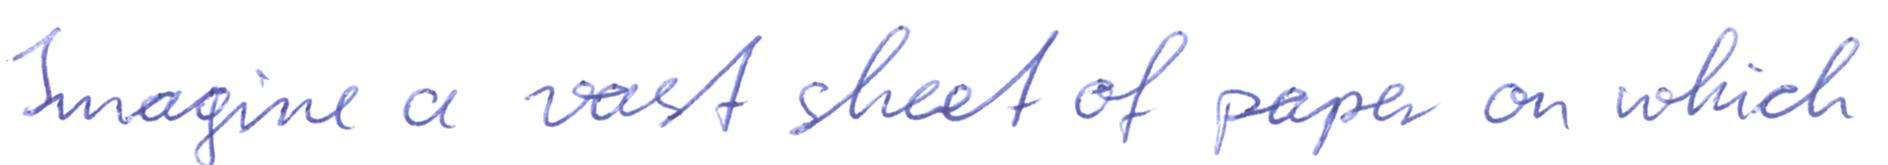

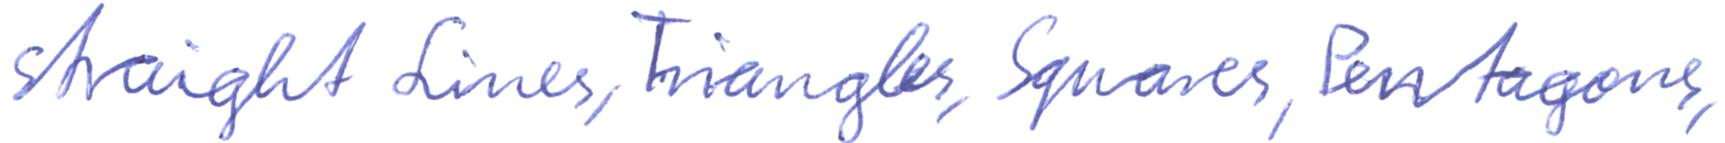

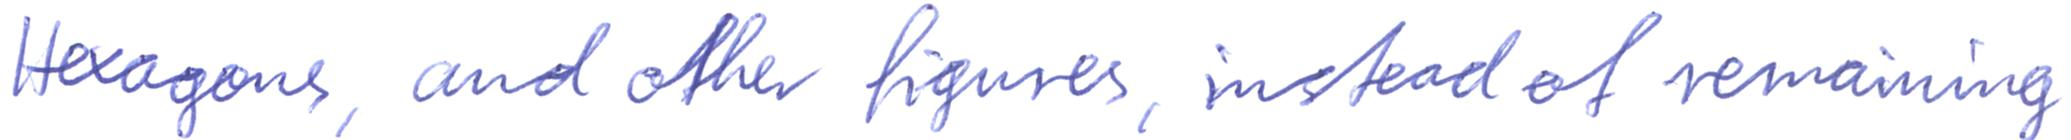

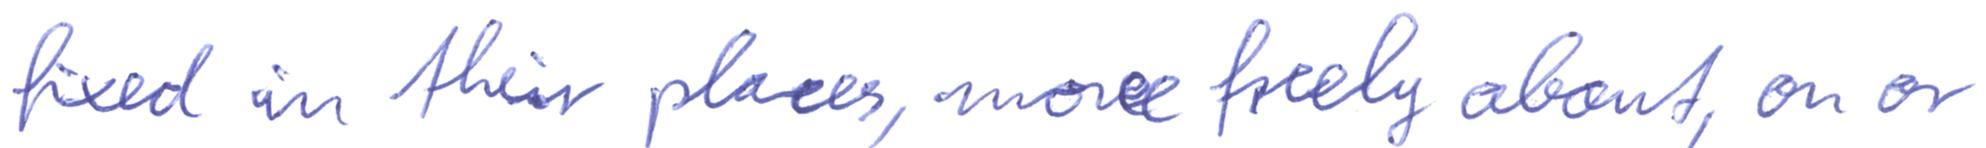

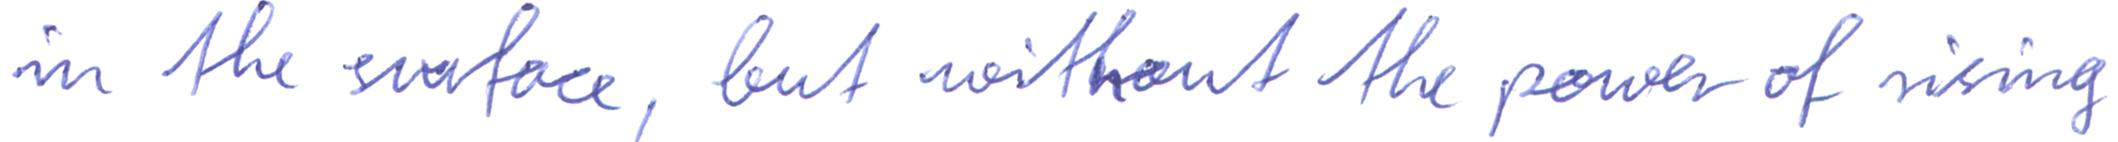

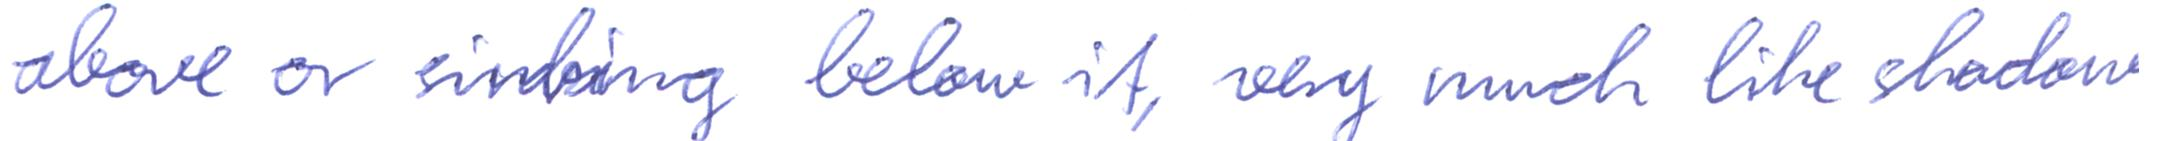

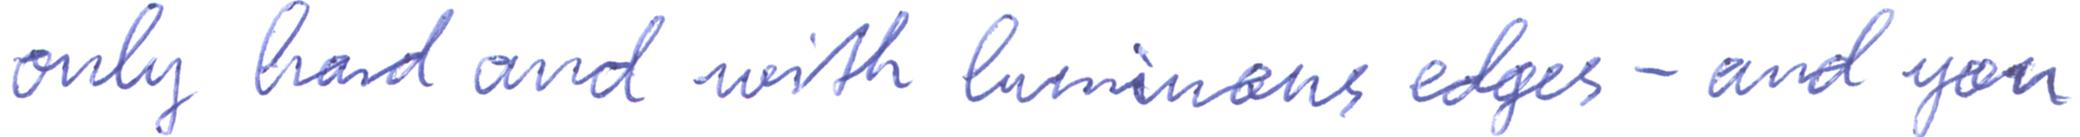

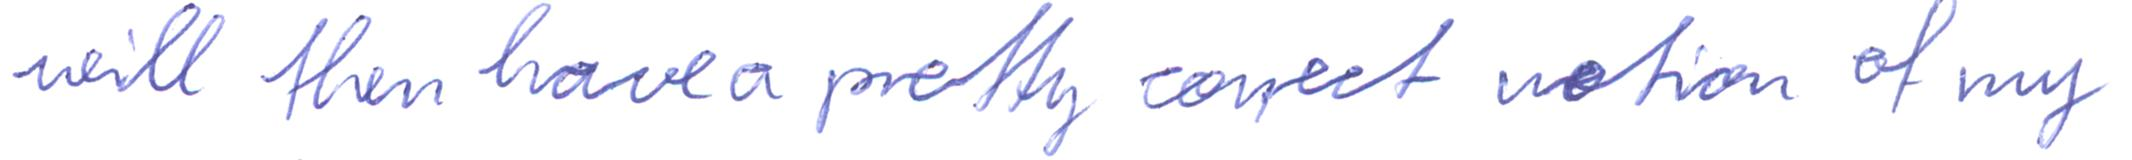

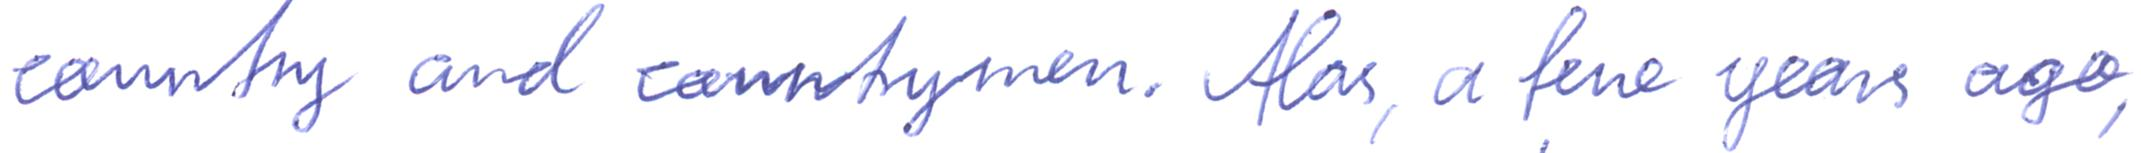

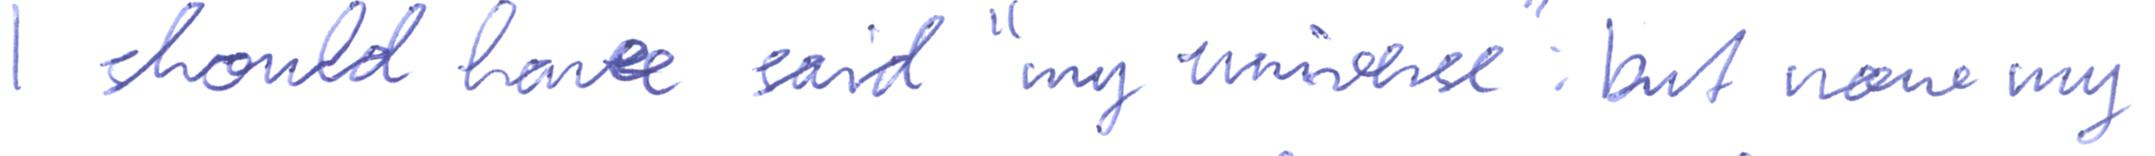

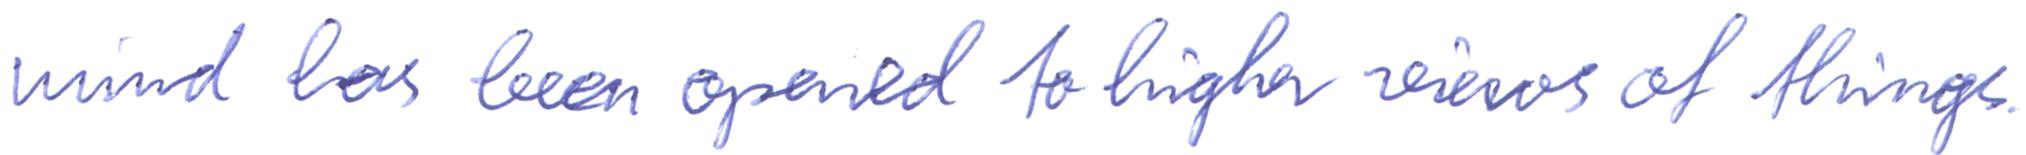

imagine a vast sheet of paper on which
straight lines triangles squares pentagons
hexagons and other figures instead of remaining
fixed in their places move freely about on or
in the surface but without the power of rising
above or sinking below it very much like shadows
only hard and with luminous edges and you
will then have a pretty correct notion of my
country and countrymen alas a few years ago
i should have said my universe but now my
mind has been opened to higher views of things


In [23]:
images, true_transcripts = get_images_and_transcripts(df, 52)
visualize_images_and_transcripts(images, true_transcripts)

The text is transcribed from a passage in the novel [Flatland by Edwin Abbott Abbott](https://en.wikipedia.org/wiki/Flatland). The data is conceptually similar to the IAM database, with single isolated lines of text, but it was recorded on paper less than 10 years ago, so it should be more representative of how people write on paper today.

How well does the model recognize the text? Run this cell to find out.

In [24]:
def transcribe_images(all_images, model, processor):
    """
    Transcribe a batch of images using an OCR model.

    Args:
        all_images: a list of PIL images.
        model: the model to do image-to-token ids
        processor: the processor which maps token ids to text

    Returns:
        a list of the transcribed text.
    """
    pixel_values = processor(images=all_images, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values.to(device))
    decoded_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
    return decoded_text

transcribed_text = transcribe_images(images, model, processor)
print(transcribed_text)

['Imagine a vast sheet of paper on which', 'Straight Lines , Triangles , Squares , Pentagon ,', 'Hexagens , and other figures , instead of remaining', 'fixed in their places , more freely about , on or', 'in the surface , but without the power of rising', 'above or sinking below it , very much like shadow', 'only had and with luminous edges - and you', 'will then have a pretty carpet notion of my', 'country and countrymen . Also , a fine years ago ,', 'I should have said " my unisence " , but now my', 'mind has been opened to higher views of things .']


### Code exercise 1.1: Calculate CER and WER

The model is not perfect but it performs far better than chance. Let's measure the character and the word error rates on this subject's data.

The character error rate between a reference string `ref` and a predicted string `pred` is defined as:

$$CharErrorRate = \frac{S+D+I}{N}$$

* $S$ is the number of substitutions needed to transform the predicted string to the reference string
* $D$ is the number of deletions needed to transform the predicted string to the reference string
* $I$ is the number of insertions needed to transform the predicted string to the reference string
* $N$ is the number of characters in the reference string

For example, to transform `3nanas` to `banana`, we'd need to replace `3` with `b`, insert an `a`, and delete the `s`. The character error rate would $(1+1+1)/6=0.5$. The word error rate is defined similarly, but at the single word rather than the character level.

Thankfully, we can use a library function to help us out! Inside the `torchmetrics.functional.text` module we have access to the functions: `char_error_rate(preds, refs)`, which calculates the average *character error rate* over a list of predictions and references. We also have access to `word_error_rate(preds, refs)`, which does the same for the average *word error rate*.

Your task is to fill in missing code to measure character and word error rates on this dataset.

In [29]:
import torchmetrics.functional.text as fm

def clean_string(input_string):
    """
    Clean string prior to comparison

    Args:
        input_string (str): the input string

    Returns:
        (str) a cleaned string, lowercase, alphabetical characters only, no double spaces
    """

    # Convert all characters to lowercase
    lowercase_string = input_string.lower()

    # Remove non-alphabetic characters
    alpha_string = re.sub(r'[^a-z\s]', '', lowercase_string)

    # Remove double spaces and start and end spaces
    return re.sub(r'\s+', ' ', alpha_string).strip()


def calculate_mismatch(estimated_text, reference_text):
    """
    Calculate mismatch (character and word error rates) between estimated and true text.

    Args:
        estimated_text: a list of strings
        reference_text: a list of strings

    Returns:
        A tuple, (CER and WER)
    """
    # Lowercase the text and remove special characters for the comparison
    estimated_text = [clean_string(x) for x in estimated_text]
    reference_text = [clean_string(x) for x in reference_text]

    # ############################################################
    # # Fill in this code to calculate character error rate and word error rate.
    # # Hint: have a look at the torchmetrics documentation for the proper
    # # metrics (type the proper metric name in the search bar).
    # #
    # # https://lightning.ai/docs/torchmetrics/stable/
    # raise NotImplementedError("Student has to fill in these lines")
    # ############################################################

    # Calculate the character error rate and word error rates. They should be
    # raw floats, not tensors.
    cer = fm.char_error_rate(estimated_text, reference_text).item()
    wer = fm.word_error_rate(estimated_text, reference_text).item()
    return (cer, wer)

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W1D1_Generalization/solutions/W1D1_Tutorial1_Solution_4d36b048.py)



In [30]:
cer, wer = calculate_mismatch(transcribed_text, true_transcripts)
assert isinstance(cer, float)
cer, wer

(0.03326403349637985, 0.10000000149011612)

For this particular subject, the character error rate is 3.3%, while the word error rate is 10%. Not bad, and in line with the results in the paper.

In [31]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Code_Exercise_1.1")

### Code exercise 1.2: Calculate CER and WER across all subjects

Let's measure the same metric as before, but this time across *all subjects*. Note: If you run this code on a CPU, it might take around 5 minutes to complete.

In [38]:
def calculate_all_mismatch(df, model, processor):
    """
    Calculate CER and WER for all subjects in a dataset

    Args:
        df: a dataframe containing information about images and transcripts
        model: an image-to-text model
        processor: a processor object

    Returns:
        a list of dictionaries containing a per-subject breakdown of the
        results
    """
    subjects = df.subject.unique().tolist()

    results = []

    # Calculate CER and WER for all subjects
    for subject in tqdm.tqdm(subjects):
        ############################################################
        # Fill in the section to calculate the cer and wer for a
        # single subject. Look up at other sections to see how it's
        # done.
        # raise NotImplementedError("Student exercise")
        ############################################################

        # Load images and labels for a given subject
        images, true_transcripts = get_images_and_transcripts(df, subject)

        # Transcribe the images to text
        transcribed_text = transcribe_images(images, model, processor)

        # Calculate the CER and WER
        cer, wer = calculate_mismatch(transcribed_text,true_transcripts)

        results.append({
            'subject': subject,
            'cer': cer,
            'wer': wer,
        })
    return results

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W1D1_Generalization/solutions/W1D1_Tutorial1_Solution_cbbb272d.py)



In [39]:
results = calculate_all_mismatch(df, model, processor)
df_results = pd.DataFrame(results)
df_results

100%|██████████| 10/10 [00:17<00:00,  1.71s/it]


,subject,cer,wer
0,52,0.033264,0.100000
1,57,0.115942,0.222222
2,58,0.028926,0.077778
3,59,0.066116,0.144444
4,74,0.062370,0.155556
5,75,0.068041,0.177778
6,76,0.039337,0.122222
7,77,0.041494,0.111111
8,78,0.083160,0.177778
9,79,0.026971,0.100000


Not all subjects are as easy to transcribe as subject 52! Let's check out subject 57, who has a high CER and WER (worse performance).

In [ ]:
print("A subject that's harder to read")
images, true_transcripts = get_images_and_transcripts(df, 57)
visualize_images_and_transcripts(images, true_transcripts)

Indeed, this text seems harder to read.

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Code_Exercise_1.2")

### Code exercise 1.3: Measure OOD generalization

What we've done so far is to measure the *empirical loss* - the average *character error rate* for each subject. The empirical loss is defined as:

$$R^e(\theta) = \mathbb{E}^e[ L(y, f(x, \theta)) ] $$

Here:

* The environment $e$ defines the scope of the input data we're using to assess model fit
* $R^e(\theta)$ is the empirical risk (average loss) in an environment (a dataset split, i.e. train/val/test)
* $\theta$ are the learned parameters (model weights) of the TrOCR model
* $x$ is the input data (here: handwritten images)
* $f$ is the TrOCR model, a function (neural network architecture) which maps images ($x$) to probabilities of certain tokens
* $L$ is the loss we have defined (here: the character error rate (CER) over inputs $x$)
* $\mathbb{E}^e$ is the expectation taken over all the samples

In our example, a single environment $e$ corresponds to a single subject. The out-of-distribution generalization is instead given by:

$$R^{OOD} = \max_{e \in \mathcal{E}_{all}} R^e(\theta) $$

It's the worst-case empirical loss over the out-of-distribution environments ${e \in \mathcal{E}_{all}}$ we wish to deploy on. In other words, this defines the character error rate for the subject ($e$) with the most difficult-to-read handwriting, resulting in the largest empirical loss value (high loss values are further from models that fit the data very well).

Our note transcription app is **robust** and **generalizes** if it works well even for the person with the worst (illegible) handwriting. The app is only as good as how well it works in the worst-case scenario. Let's measure that.

In [ ]:
def calculate_mean_max_cer(df_results):
    """
    Calculate the mean character-error-rate across subjects as
    well as the maximum (that is, the OOD risk).

    Args:
        df_results: a dataframe containing results

    Returns:
        A tuple, (mean_cer, max_cer)
    """
    ############################################################
    # Fill in the section to calculate the mean and max cer
    # across subjects.
    raise NotImplementedError("Student exercise")
    ############################################################

    # Calculate the mean CER across test subjects.
    mean_subjects = ...

    # Calculate the max CER across test subjects.
    max_subjects = ...
    return mean_subjects, max_subjects

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W1D1_Generalization/solutions/W1D1_Tutorial1_Solution_7cf70ea7.py)



In [ ]:
mean_subjects, max_subjects = calculate_mean_max_cer(df_results)
mean_subjects, max_subjects

We see that:

* when measured on this (admittedly small) out-of-distribution dataset, the average character error rate is about 5.8%, larger than the 3.4% reported for IAM
* the out-of-distribution character error rate is 12%

Is that good enough for what we need? Well, that depends on the exact use case.

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Code_Exercise_1.3")

## Discussion

Numbers in tables filled with benchmarks don't tell the whole story: often, we care about OOD robustness. Our developer benchmarked the TrOCR model for *their use case* and found a worst-case character error rate above 10%. Whether or not that's acceptable is a judgment call, and it's not the only metric we might care about. We might also need to meet other constraints:

- Memory, FLOPs, latency, cost of inference: the deployment environment might not be able to support very large-scale models because of memory or compute constraints, or those would run too slowly for the use case. Cloud inference might not be practical with limited internet access.
- SWaP-C: if the model is embodied in a physical device, the Size, Weight, Power and Cost of that device will ultimately be important. More powerful models can require bigger, heavier, more power-hungry hardware.
- Latency of development: a bespoke model developed from scratch might take a long time to develop; our busy developer might prefer to adopt a pretrained, sub-optimal architecture than using a custom architecture
- Cost of upkeep: machine learning systems can be notoriously difficult to keep running. Our developer might prefer to use a suboptimal system managed by somebody else rather than taking on the burden of dealing with the upkeep themselves.

Ideally, we want to publish this app soon! We decide on a strategy: the model is good enough to ge us started. We'll deploy the model as is, but we'll have an option in the app to report errors. We'll then label *those* errors and fine-tune the model further. Before that, we want to understand what's inside the model.

In [ ]:
# @title Video 3: TrOCR

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'CFhBX4CL-88'), ('Bilibili', 'BV1iz421b7Qb')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_trocr")

---
# Section 3: Dissecting TrOCR

TrOCR is a model that performs printed optical character recognition and handwriting transcription using the transformer model. But what's inside of it?
It's important to note here that the original transformer model consisted of an encoder step, following by a decoder step. Taken together, this was the initial Transformer model of Vaswani et al. However, subsequent research into transformers led researchers to find applications of the encoding step specifically (encoding models like BERT) and also specific applications of the decoder step (autoregressive models like GPT). This meant that the terminology then changed to be *encoder transformers* and *decoder/causal/autoregressive transformers*. TrOCR is an example of the original transformer setup (both an encoder step and decoder step joined together). The image below outlines this setup. This also matches the transformer architecture given in the video above.

![Picture which shows trocr architecture.](https://github.com/neuromatch/NeuroAI_Course/blob/main/tutorials/W1D1_Generalization/static/trocr_architecture.png?raw=true)



TrOCR uses the encoder-decoder architecture, as explained above:

1. An encoder, a vision transformer (ViT), maps 16x16 patches of the image to individual tokens
2. A decoder, a text transformer, maps previously decoded text and the encoder's hidden state to the next token in the sequence to be decoded. This is known as causal language modeling.

## Section 3.1: The encoder

Let's dig in more specifically into the **encoder** inside of TrOCR. It's a visual transformer (ViT), an adaptation of transformers to process images. It proceeds as follows:

1. It takes a raw image and resizes it to 384x384
2. It chops it up into 16x16 patches
3. It embeds each patch inside a fixed, 768-dimensional space
4. Positional embeddings are added to give the model sequence order information
5. It passes the patches through self-attention layers.
6. It ends up with one token for each patch, plus one for the class embedding ([CLS] token), $577=(384/16)^2+1$.

Let's look at the structure of the encoder:

In [ ]:
model.encoder

### Code exercise 3.1: Understanding the inputs and outputs of the encoder

Let's make sure we understand how the encoder operates by giving it a sample input and checking that its output matches the expected shape.

In [ ]:
def inspect_encoder(model):
    """
    Inspect encoder to verify that it processes inputs in the expected way.

    Args:
        model: the TrOCR model
    """
    ##################################################################
    # Feed the encoder an input and measure the output to understand
    # the role of the vision encoder.
    raise NotImplementedError("Student exercise")
    #
    ##################################################################
    # Create an empty tensor (batch size of 1) to feed it to the encoder.
    # Remember that images should have 3 channels and have size 384x384
    # Recall that images are fed in pytorch with tensors of shape
    # batch x channels x height x width
    single_input = ...

    # Run the input through the encoder.
    output = ...

    # Measure the number of hidden tokens which are the output of the encoder
    hidden_shape = output['last_hidden_state'].shape

    assert hidden_shape[0] == 1
    assert hidden_shape[1] == 577
    assert hidden_shape[2] == 768

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W1D1_Generalization/solutions/W1D1_Tutorial1_Solution_22613224.py)



In [ ]:
inspect_encoder(model)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Code_Exercise_3.1")

The vision transformer acts much like a conventional encoder transformer in sequence-to-sequence tasks: it maps the input sequence to a hidden (latent) representation, the image tokens. This hidden representation is then attended to during the decoding step in the using cross-attention layers.

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Encoder")

## Section 3.2: The decoder

The decoder is another transformer that attends to both the image tokens and string tokens. At a given point in the decoding, the decoder uses both the reference image and the string prefix to predict the next text token to produce. In this fashion, the transcript is built one token at a time.

We can view the structure of the decoder to find both self-attention layers `self_attn` that attend to the string prefix, as well as cross-attention layers `encoder_attn` that attend to the image while processing the string prefix.

In [ ]:
model.decoder

Notice that `encoder_attn` layers have an input dimensionality of 768, which matches the shape of the visual tokens. Its output dimensionality is 1024, which matches the string tokens.

To see how the decoder takes a visual input to generate a text caption, we can feed a sample image to the encoder to obtain its encoding, then pass it to the decoder, and inspect the outputs.

In [ ]:
# The sample image
images[0]

In [ ]:
pixel_values = processor(images=[images[0]], return_tensors="pt").pixel_values
encoded_image = model.encoder(pixel_values.to(device))
encoded_image.last_hidden_state.shape

Consistent with what we found previously, the image is encoded into 577 tokens, each of dimensionality 768. Let's pass these to the decoder:

In [ ]:
decoded = model.decoder.forward(
    input_ids=torch.Tensor([[0]]).to(device, dtype=int),
    encoder_hidden_states=encoded_image['last_hidden_state'],
)
print(decoded.logits.shape)
decoded.logits.argmax()

The decoder gives probabilities for all 50,265 potential tokens in the tokenizer's vocabulary. The most likely token has the number 31,206. What human-readable concept does this correspond to? The `processor` can translate between token numbers and strings. Let's give it a try.

In [ ]:
processor.tokenizer.decode(31206)

It's the first word in the sentence! We can keep feeding the outputs of the decoder to itself to decode a string. This is normally done internally by the `transformers` library, but we can simulate the process to understand better how the model internals work.

In [ ]:
decoded = model.decoder.forward(
    input_ids=torch.Tensor([[0, 31206]]).to(device, dtype=int),
    encoder_hidden_states=encoded_image['last_hidden_state'],
)
processor.tokenizer.decode(decoded.logits[:, -1, :].argmax().item())

Continuing this process allows us to transcribe the entire image by choosing the most likely next word, which often leads to a suboptimal decoding. A common technique to improve this is to keep multiple likely decoding possibilities in memory, pruning as we process more of the sequence. We only deciding on the very best sequence at the end. This is known as *beam search*. `model.generate` uses beam search to return best transcription from the model.

In [ ]:
# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the appropriate device
model.to(device)

# move it to the same device
pixel_values = pixel_values.to(device)

# Generate the sequence using the model
best_sequence = model.generate(pixel_values)

# Decode the generated sequence
decoded_sequence = processor.tokenizer.decode(best_sequence[0])
print(decoded_sequence)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Decoder")

## Interactive exploration 3.2: What the model pays attention to

We've just seen that these are two relatively large-scale transformers that are connected in the original encoder-decoder architecture. The transformers themselves are generic and have relatively weak built-in inductive biases. Has the model learned to process the sequence reasonably?

One tool at our disposal to address this question is to look at the **attention pattern** in the decoding heads as we process an image. By looking at the output of the cross-attention heads, we can gain an intuitive understanding of what the model "looks at" or "attends to".

Let's look at how the model's attention evolves as we process more and more of the sequence.

In [ ]:
decoded = model.decoder.forward(
    input_ids=best_sequence,
    encoder_hidden_states=encoded_image['last_hidden_state'],
    output_attentions=True
)

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt

def visualize_attention(layer, head):
    plt.figure(figsize=(10, 10))

    image = images[0]
    for token in range(decoded.cross_attentions[layer].shape[2]):
        attention_pattern = decoded.cross_attentions[layer][0, head, token, 1:].reshape((24, 24))
        attention_pattern = attention_pattern.detach().cpu().numpy()

        print(processor.decode(best_sequence[0][:token+1]))
        plt.imshow((np.array(image).mean(axis=2)).astype(float), cmap='gray')
        plt.imshow(attention_pattern, extent=[0, image.width, 0, image.height], alpha=attention_pattern/attention_pattern.max(), cmap='YlOrRd')
        plt.axis('off')
        plt.gca().invert_yaxis()
        plt.show()


# Create interactive widgets
layer_slider = widgets.IntSlider(min=0, max=len(decoded.cross_attentions)-1, step=1, value=7, description='Layer')
head_slider = widgets.IntSlider(min=0, max=decoded.cross_attentions[0].shape[1]-1, step=1, value=5, description='Head')

# Create the interactive visualization
interact(visualize_attention, layer=layer_slider, head=head_slider)

You'll notice that attention heads in intermediate layers seem to track the likely location of the next word in the input image, left to right. It is remarkable that the model has learned an important aspect of the spatial structure of sentences written in the Latin alphabet, which is that words are written left-to-right and that words have a certain characteristic width.

**Positional encoding** allows the model to express spatial biases. Without these biases, the model would be *position invariant*, meaning that the same representations would be generated if the input word order were shuffled. However, nothing in the model **predetermines** that text must be left to right: it learns that structure through data. The model follows the standard recipe of modern AI: take a model with weak inductive biases that scales well, and train it on large-scale data to guide the inductive biases to more naturally capture important features of the data.

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Interactive_Exploration_3.2")

In [ ]:
# @title Video 4: Weak Inductive Biases

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', '4BTM5Mrb94Y'), ('Bilibili', 'BV1jw4m1v7g6')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_weak_inductive_biases")

---
# Section 4: The magic in the data

It's straightforward to write down the encoder-decoder transformer used by TrOCR – it's conceptually similar to the original transformer as outlined in Vaswani et al. (2017). What is special about this model is a training pipeline that ensures good generalization. It's worth taking a look at the TrOCR paper to see the many different sources of data that are used to train the model:

1. [The encoder is pretrained on masked image modeling on ImageNet-22k](https://huggingface.co/docs/transformers/en/model_doc/beit)
2. [The decoder is pretrained on masked language modeling on 160GB of raw text](https://arxiv.org/abs/1907.11692)
3. The entire model is trained end-to-end on 648M text lines found in 2M PDF pages on the internet, with the fonts randomly swapped
4. The model is then fine-tuned end-to-end on the IAM handwriting dataset, with extensive input data augmentations

Let's look at a few of these concepts in a bit more detail.

## Section 4.1: Transfer learning

Modern neural networks are often pre-trained on large datasets. For example, the TrOCR model's decoder is pretrained on masked language modeling on 160GB of raw text. The frozen weights are used as initialization for the model, a form of transfer learning. The same principle applies to the encoder, which is pretrained on masked image modeling on ImageNet-22k. Although these tasks are quite different from the final task of handwriting recognition, the model learns useful features that can be transferred to the final task. In vision models that process images, we see that models trained on real-world data learn important concepts like shapes, colors and textures often found in the real world. When switching to a different dataset domain, these components are often still present and this is an example of positive transfer, where a model can skip over learning filters to detect these core basic ideas and quickly specialise on learning the more unique characteristics of the data set.

The datasets involved in pre-training are often large: 160GB of raw text would take a human close to 1000 lifetimes to write! Yet, this is quite small by modern standards: [FineWeb](https://huggingface.co/spaces/HuggingFaceFW/blogpost-fineweb-v1?utm_source=ainews&utm_medium=email&utm_campaign=ainews-mamba-2-state-space-duality) is almost a thousand times larger. It's an incredible feat of engineering that we can build models that learn effective representations from such large scale data. Richard Sutton's famous note: "The Bitter Lesson" summarised this notion quite elegantly: Models trained on more data tend to perform better and generalize better when they are allowed to scale.

### Reflection

What happens when we've trained on all the data we can find? What are other ways we can improve generalization?

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_transfer_learning")

## Section 4.2: Generalization via augmentation

Another important ingredient in this model is the use of multiple augmentations of the data. When data is sparse, this can improve generalization. Thus, we take a high-capacity model with few built-in inductive biases and, via augmentations of the input samples, let it learn the structure of the data, encouraging generalization.

By applying various transformations to images and displaying the results, you can visually understand how augmentation works and what its impact is on model performance. Let's look at parts of the TrOCR recipe.

Let's start by loading and visualizing our chosen image.

![Picture which shows neuroai_hello_world.](https://github.com/neuromatch/NeuroAI_Course/blob/main/tutorials/W1D1_Generalization/static/neuroai_hello_world.png?raw=true)

Now, we will apply a few transformations to this image. Feel free to play around with the input values!

In [ ]:
# Convert PIL Image to Tensor
image = IMG.open("neuroai_hello_world.png")
image = transforms.ToTensor()(image)

# Define each transformation separately
# RandomAffine: applies rotations, translations, scaling. Here, rotates by up to ±15 degrees,
affine = transforms.RandomAffine(degrees=5, translate=(0.1, 0.1), scale=(0.9, 1.1))

# ElasticTransform: applies elastic distortions to the image. The 'alpha' parameter controls
# the intensity of the distortion.
elastic = transforms.ElasticTransform(alpha=25.0)

# RandomPerspective: applies random perspective transformations with a specified distortion scale.
perspective = transforms.RandomPerspective(distortion_scale=0.2, p=1.0)

# RandomErasing: randomly erases a rectangle area in the image.
erasing = transforms.RandomErasing(p=1, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random', inplace=False)

# GaussianBlur: applies gaussian blur with specified kernel size and sigma range.
gaussian_blur = transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.8, 5))

Let's now combine them in a single list and display the images.

In [ ]:
# A list of all transformations for iteration
transformations = [affine, elastic, perspective, erasing, gaussian_blur]

# Display
display_transformed_images(image, transformations)

The transformations applied to the model include:

1. **Original**: the baseline image without any modifications.
2. **RandomAffine**: applies random affine transformations to the image, which include translation, scaling, rotation, and shearing. This helps the model become invariant (not sensitive) to such transformations in the input data.
3. **ElasticTransform**: introduces random elastic deformations, simulating transformations that might occur naturally. It is useful for tasks where we expect such distortions, like medical image analysis.
4. **RandomPerspective**: changes the perspective from which the image is viewed, simulating the effect of viewing the object from different angles.
5. **RandomErasing**: randomly removes parts of the image and fills it with some arbitrary pixel values. It can make the model robust against occlusions in the input data.
6. **GaussianBlur**: applies a Gaussian blur to the image, smoothing it. This can help the model better deal with out-of-focus images.

All of these augmentations are part of this model's training recipe and they help to prevent overfitting and improve the generalization of the model to new, unseen images. We can compose these to create new challenging training images:

In [ ]:
# Combine all the transformations
all_transforms = transforms.Compose([
    affine,
    elastic,
    perspective,
    erasing,
    gaussian_blur
])

# Apply combined transformation
augmented_image_tensor = all_transforms(image)

display_original_and_transformed_images(image, augmented_image_tensor)

All those transformation create a challenging curriculum that encourages the model to generalize better. Note that we're limited by our imagination in creating these augmentations. Some real world invariances, for example invariance to the style of handwritten characters, can be hard to simulate with this approach.

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Augmentation")

## Section 4.3: Generalization via synthetic data

When augmentation is not enough to induce good generalization, we can try training on synthetic data. **Data augmentation** creates variations of existing data without changing its inherent properties, while **synthetic data** generation creates entirely new data that mimics the characteristics of real data.

In our case, generating new synthetic text samples is feasible. Digital text can be rendered in a wide range of cursive fonts to simulate real (handwritten) data. Here, we'll show this idea by defining strings and generating synthetic images.

In [ ]:
# Define strings
strings = ['Hello world', 'This is the first tutorial', 'For Neuromatch NeuroAI']

# Specify font path
font_path = "DancingScript-VariableFont_wght.ttf"  # Ensure this path is correct

# Example usage
strings = ['Hello world', 'This is the first tutorial', 'For Neuromatch NeuroAI']
font_path = "DancingScript-VariableFont_wght.ttf"  # Ensure this path is correct

# Create a generator with the specified parameters
generator = image_generator(strings, font_path, space_width=2, skewing_angle=3)

i = 1
for img in generator:
  plt.imshow(img, cmap='gray')
  plt.title(f"Example {i}")
  plt.axis('off')
  plt.show()
  i += 1

### Discussion point

What does this type of synthetic data capture that wouldn’t be easy to capture through data augmentation?

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Synthetic_Data")

### Interactive demo 4.1: Generating handwriting style data

We can take this idea further and generate handwriting-style data. We will use an embedded `calligrapher.ai` model to generate new snippets of writing data. This generator is based off of a recurrent neural network trained on the same corpus of handwritten data as the TrOCR model, the IAM dataset.

In [ ]:
IFrame("https://www.calligrapher.ai/", width=800, height=600)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Generate_Handwriting")

# Conclusion

We train models to minimize a loss function. Oftentimes, however, what we care about is something different, like how well the model will generalize when it's deployed. We got a big shock when comparing the OOD robustness of the model to its empirical loss on the train set: the character error rate was **several times larger than expected**. Motivated by other factors, like engineering complexity, we decided to move forward and deploy a handwriting transcription system, hoping it could be later fine-tuned on user data.

There's a lot that goes into the training of robust AI models that can generalize well. Generic high-capacity models with weak inductive biases, like transformers, are trained on large-scale data. Pretraining, augmentations, and synthetic data can all be part of the recipe for learning structure that might be hard to express mathematically, such as the fact that text is written left to right. Because large-scale models can often require a significant amount of computation to train, in practice, models that have been trained for other purposes are adapted and re-used, preventing the need to learn from scratch (transfer learning). These models embody what's known as ["the bitter lesson"](http://www.incompleteideas.net/IncIdeas/BitterLesson.html) : general methods that leverage computation are ultimately the most effective, and by a large margin.

In [ ]:
# @title Video 5: Final Thoughts

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'fxgIYvbU1Pg'), ('Bilibili', 'BV1ci421e7mq')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_final_thoughts")

---
# The Big Picture

* Artificial intelligence practitioners aim to maximize the performance of their systems under engineering constraints of size, weight, power, cost, latency, and maintenance.
* In-distribution performance doesn't tell the whole story: out-of-distribution robustness should be measured to determine how well a model will perform when deployed in the real world.
* Generic models with weak inductive biases, like transformers, can learn structure from large-scale data.
* Several strategies can be used to build models that encourage better generalization, all of which take advantage from ever larger amounts of data:
  * Transfer learning
  * Augmentations
  * Synthetic examples